# Testing GT catalogue load

Objectives:
    1. Test GT simulation waveform loaded through nrc-catalogue-tools.

## Load the library

In [5]:
import sys

#p1 = "/home/vaishakp/Codes/custom_libraries/nr-catalog-tools"
#libpath = '/mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/nr-catalog-tools'
#libpath = '/home/vaishakprasad/Documents/Codes/nr-catalog-tools-vp'
libpath = '/home/vprasad/Documents/Projects/nr-catalog-tools-vp'
#lalpath = '/home/vaishakprasad/soft/lalsuite-dev/lib/python3.11/site-packages'
#lalpath = '/home/vaishakprasad/soft/lalsuite-dev/lib/python3.11/site-packages'

if libpath not in sys.path:
    sys.path.append(libpath)

#if lalpath not in sys.path:
#    sys.path = [lalpath] + sys.path
    
print(sys.path)

['/home/vprasad/Documents/Projects/nrcattools-local/test/notebooks', '/home/vprasad/Documents/Projects/config', '/home/vprasad/Documents/Projects/waveformtools', '/home/vprasad/anaconda3/envs/nrcat/lib/python310.zip', '/home/vprasad/anaconda3/envs/nrcat/lib/python3.10', '/home/vprasad/anaconda3/envs/nrcat/lib/python3.10/lib-dynload', '', '/home/vprasad/anaconda3/envs/nrcat/lib/python3.10/site-packages', '/home/vprasad/Documents/Codes/nr-catalog-tools-vp', '/home/vprasad/Documents/Projects/nr-catalog-tools-vp']


## Display the environment

In [6]:
%%bash
python --version
conda info --envs | grep '*'

Python 3.10.8
nrcat                 *  /home/vprasad/anaconda3/envs/nrcat


# Method I : through nr-catalogue-tools

In [7]:
import nrcatalogtools

No version information file '.version' found


In [8]:
import nrcatalogtools.lvc as lalutils

In [9]:
from nrcatalogtools.lvc import get_lal_mode_dictionary_from_lmax

In [178]:
import numpy as np
from nrcatalogtools.maya import MayaCatalog
import matplotlib.pyplot as plt


#####################
# matplotlib presets
#########################################

labelsize=16
labelpad=14

plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"figure.figsize" : (8,6)})
#plt.rcParams.update({"axes.grid" : True})
plt.rcParams.update({"axes.labelpad" : labelpad})
plt.rcParams.update({"axes.labelsize" : labelsize})
plt.rcParams.update({"figure.autolayout" : True})
plt.rcParams.update({"grid.alpha" : 0.3})
plt.rcParams.update({"grid.alpha" : 0.3})
plt.rcParams.update({'legend.markerscale': 12})

In [11]:
#from nrcatalogtools.rit import RITCatalog

from nrcatalogtools import utils
from nrcatalogtools.waveform import WaveformModes

In [12]:

import sxs


In [13]:
# View SXS cache
sxs.sxs_directory("cache")

PosixPath('/home/vprasad/.cache/sxs')

In [14]:
nrcatalogtools.__file__

'/home/vprasad/Documents/Projects/nr-catalog-tools-vp/nrcatalogtools/__init__.py'

### MAYA cat details

In [15]:
nrcatalogtools.utils.maya_catalog_info

{'cache_dir': PosixPath('/home/vprasad/.cache/MAYA'),
 'url': 'https://raw.githubusercontent.com/cevans216/gt-waveform-catalog/master/h5files',
 'metadata_url': 'https://raw.githubusercontent.com/cevans216/gt-waveform-catalog/master/catalog-table.txt',
 'data_dir': PosixPath('/home/vprasad/.cache/MAYA/data'),
 'metadata_dir': PosixPath('/home/vprasad/.cache/MAYA/metadata'),
 'data_url': 'https://raw.githubusercontent.com/cevans216/gt-waveform-catalog/master/h5files'}

In [16]:
# Simulation name
sim_name = 'GT0001'

# Parameters
M = 40
D = 1000
inc = np.pi/3 #np.pi/3 - 0.0001
coa_phase = np.pi/6
coa_phase0 = np.pi/6
delta_t = 1./2048

## Load waveform

Computing reference time..
Reference time not found in waveform h5 file.
Reference time not found in simulation metadata file.
Reference time should be computed fromthe reference orbital frequency!
Reference orbital phase not found in simulation metadata.Proceeding to retrieve from the h5 file.. 'Omega'
/home/vprasad/Documents/Projects/waveformtools/waveformtools
No interpolation required.


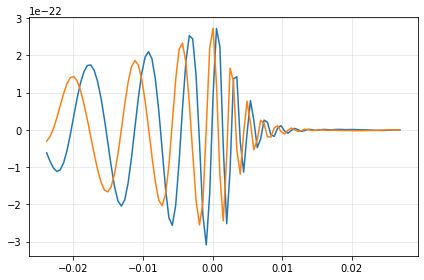

In [17]:
#sc = sxs.Catalog.load(download=True)
#rc = RITCatalog.load(verbosity=5, download=True)
mc = MayaCatalog.load(verbosity=5, download=True)

mwf = mc.get(sim_name)

hpc = mwf.get_td_waveform(total_mass=M, distance=D, inclination=inc,
                    coa_phase=coa_phase, delta_t=delta_t
                    )
hpc_pycbc = hpc # mwf.to_pycbc(hpc)
hp1, hx1 = hpc_pycbc.real(), hpc_pycbc.imag()

plt.plot(hp1.sample_times, hp1)
plt.plot(hx1.sample_times, hx1)
plt.grid()
plt.show()

# Method II :

Using [the script](https://github.com/cevans216/gt-waveform-catalog/tree/master/scripts)

In [18]:
import lal

In [19]:
# Lal path
lal.__file__

'/home/vprasad/anaconda3/envs/nrcat/lib/python3.10/site-packages/lal/__init__.py'

## Original script, no changes

import h5py
import lal
import lalsimulation as lalsim
from pycbc import pnutils
from matplotlib import pyplot
import numpy

file = f'{fdir}/data/GT0001.h5'

f = h5py.File(file, 'r')

params = {}

# Extrinsic parameters:

params['f_lower'] = 20.0
params['mtotal'] = 150.0
params['inclination'] = 0.0
params['distance'] = 100.0

# Metadata parameters:

params['eta'] = f.attrs['eta']

params['mass1'] = pnutils.mtotal_eta_to_mass1_mass2(params['mtotal'], params['eta'])[0]
params['mass2'] = pnutils.mtotal_eta_to_mass1_mass2(params['mtotal'], params['eta'])[1]

params['spin1x'] = f.attrs['spin1x']
params['spin1y'] = f.attrs['spin1y']
params['spin1z'] = f.attrs['spin1z']
params['spin2x'] = f.attrs['spin2x']
params['spin2y'] = f.attrs['spin2y']
params['spin2z'] = f.attrs['spin2z']


params['coa_phase'] = f.attrs['coa_phase']

    
f.close()

#
dt = 1.0/4096.0

from pycbc.waveform import get_td_waveform

hp, hc = get_td_waveform(approximant='NR_hdf5',
                         numrel_data=file,
                         mass1=params['mass1'],
                         mass2=params['mass2'],
			 spin1x=params['spin1x'],
			 spin1y=params['spin1y'],
                         spin1z=params['spin1z'],
			 spin2x=params['spin2x'],
                         spin2y=params['spin2y'],
			 spin2z=params['spin2z'],
                         delta_t=dt,
                         f_lower=30.0,
                         inclination=params['inclination'],
                         coa_phase=params['coa_phase'],
                         distance=params['distance'])

#
t = numpy.array(range( len(hp) ) )*dt
pyplot.figure()
pyplot.plot( t, hp, color=[0,0.7071,1] )
pyplot.show()


Here, `coa_phase` is missing from h5 file's attributes. Correcting for this and loading the same simulation as in the catalogue load, 

In [20]:
from pycbc.waveform import td_approximants, fd_approximants

# List of td approximants that are available
#print(td_approximants())

apx = 'SEOBNRv4_ROM'
if apx not in td_approximants():
    #print('Apx not loaded correctly!')
    raise AttributeError(f'Approximant {apx} not found! Please check `LAL_DATA_PATH`')
# List of fd approximants that are currently available
#print(fd_approximants())

In [21]:
%%bash
echo $LAL_DATA_PATH

/home/vprasad/Softwares/lalsuite-extra/data/lalsimulation


In [22]:

import lal
import lalsimulation as lalsim
from pycbc import pnutils


In [23]:
from nrcatalogtools.utils import maya_catalog_info
import h5py
from pycbc import pnutils

# Check h5 file attributes

fdir = maya_catalog_info['cache_dir']
fname = f'{fdir}/data/{sim_name}.h5'

ff = h5py.File(fname)

all_keys = list(ff.keys())
all_attrs = list(ff.attrs.keys())

ff.close()

all_attrs

all_keys

In [24]:
coa_phase = 1.7627061697475976

In [25]:
%%bash
export HDF5_USE_FILE_LOCKING=FALSE

['Contact Person', 'Format', 'INSPIRE-bibtex-keys', 'LNhatx', 'LNhaty', 'LNhatz', 'Lmax', 'NR-code', 'NR-group', 'NR-techniques', 'Omega', 'PN_approximant', 'Warning1', 'alternative-names', 'comparable-simulation', 'eccentricity', 'eta', 'f_lower_at_1MSUN', 'files-in-error-series', 'horizon_mass1', 'horizon_mass2', 'init_sep', 'license', 'mean_anomaly', 'modification-date', 'name', 'nhatx', 'nhaty', 'nhatz', 'number_of_orbits', 'object1', 'object2', 'point-of-contact-email', 'production-run', 'puncture_mass1', 'puncture_mass2', 'simulation-type', 'spin1x', 'spin1y', 'spin1z', 'spin2x', 'spin2y', 'spin2z', 'type']
Cannot find the attribute `coa_phase` in the file. Setting to 1.7627061697475976
Loading waveform


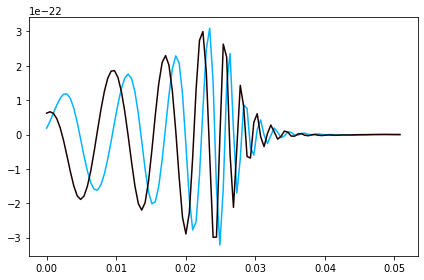

In [26]:
fdir = maya_catalog_info['cache_dir']
file = f'{fdir}/data/{sim_name}.h5'

try:
    f.close()
except:
    pass

f = h5py.File(file, 'a')

# Extrinsic parameters:
f_lower = 1
f_lower_at_1MSUN = f_lower/M
if 'f_lower_at_1MSUN' not in list(f.attrs.keys()):
    f.attrs['f_lower_at_1MSUN'] = f_lower_at_1MSUN
    f.close()
else:
    f.close()
    
f = h5py.File(file, 'r')
print(list(f.attrs.keys()))
#print(f.attrs.keys())
#print(f.keys())
params = {}





params['f_lower'] = f_lower
params['mtotal'] = M#150.0
params['inclination'] = inc#0.0
params['distance'] = D#100.0

# Metadata parameters:

params['eta'] = f.attrs['eta']

params['mass1'] = pnutils.mtotal_eta_to_mass1_mass2(params['mtotal'], params['eta'])[0]
params['mass2'] = pnutils.mtotal_eta_to_mass1_mass2(params['mtotal'], params['eta'])[1]

# BH1 spins
params['spin1x'] = f.attrs['spin1x']
params['spin1y'] = f.attrs['spin1y']
params['spin1z'] = f.attrs['spin1z']


# BH2 spins

params['spin2x'] = f.attrs['spin2x']
params['spin2y'] = f.attrs['spin2y']
params['spin2z'] = f.attrs['spin2z']


# Spin unit vectors

params['nhat'] = [f.attrs['nhatx'], f.attrs['nhaty'], f.attrs['nhatz']]
params['lnhat'] = [f.attrs['LNhatx'], f.attrs['LNhaty'], f.attrs['LNhatz']]


# Check for coa_phase, else use the phase from nr cat load.
try:
    params['coa_phase'] = f.attrs['coa_phase']
except:
    print(f'Cannot find the attribute `coa_phase` in the file. Setting to {coa_phase}')
    #raise AttributeError('Cannot find the attribute `coa_phase` in the file')
    params['coa_phase']=coa_phase

# Transform spins

# NR frame
s1 = [params['spin1x'], params['spin1y'], params['spin1z']]
s2 = [params['spin2x'], params['spin2y'], params['spin2z']]

# LAL frame
from nrcatalogtools.lvc import transform_spins_nr_to_lal
S1, S2 = transform_spins_nr_to_lal(s1, s2, params['nhat'], params['lnhat'])

from pycbc.waveform import get_td_waveform


print('Loading waveform')
hx2, hp2 = get_td_waveform(approximant='NR_hdf5',
                         numrel_data=file,
                         mass1=params['mass1'],
                         mass2=params['mass2'],
                         spin1x=S1[0],
                         spin1y=S1[1],
                         spin1z=S1[2],
                         spin2x=S2[0],
                         spin2y=S2[1],
                         spin2z=S2[2],
                         delta_t=delta_t,
                         f_lower=f_lower,
                         inclination=params['inclination'],
                         coa_phase=params['coa_phase'],
                         distance=params['distance'])

#
t = np.array(range( len(hp2) ) )*delta_t

#pyplot.figure()
plt.plot(t, hp2, color=[0,0.7071,1])
plt.plot(t, hx2, color=[0.1,0,0])
plt.show()
f.close()

In [27]:
params

{'f_lower': 1,
 'mtotal': 40,
 'inclination': 1.0471975511965976,
 'distance': 1000,
 'eta': 0.24999999,
 'mass1': 20.003999999998946,
 'mass2': 19.996000000001054,
 'spin1x': -0.0,
 'spin1y': 0.0,
 'spin1z': 0.3998831,
 'spin2x': -0.40011912,
 'spin2y': -0.0,
 'spin2z': 9e-08,
 'nhat': [-1.0, 0.0, 0.0],
 'lnhat': [0.0, 0.0, 1.0],
 'coa_phase': 1.7627061697475976}

# Method 3: waveformtools

## First, get rotation angles

In [28]:
inc, coa_phase0

(1.0471975511965976, 0.5235987755982988)

In [29]:
angles = mwf.get_angles(inclination=inc, coa_phase=coa_phase0)

In [30]:
angles

{'theta': 1.0471975511965976,
 'psi': 1.7627061697475976,
 'alpha': 3.141592653589793,
 't_ref': -1,
 'f_ref': None}

In [36]:
fdir = "/home/vprasad/.cache/MAYA/data/"
fname = f'{sim_name}.h5'

In [37]:
fdir

'/home/vprasad/.cache/MAYA/data/'

In [38]:
from waveformtools.waveforms import modes_array

In [39]:
wfm = modes_array(label='GT1', data_dir=fdir, file_name=fname)

In [40]:
wfm.load_modes(ftype='GT', var_type='Strain', resam_type=0.1)

Passing /home/vprasad/.cache/MAYA/data/ GT0001.h5
Loading RIT strain data.
Fetching all keys from H5 file
['amp_l2_m-1', 'amp_l2_m-2', 'amp_l2_m0', 'amp_l2_m1', 'amp_l2_m2', 'amp_l3_m-1', 'amp_l3_m-2', 'amp_l3_m-3', 'amp_l3_m0', 'amp_l3_m1', 'amp_l3_m2', 'amp_l3_m3', 'amp_l4_m-1', 'amp_l4_m-2', 'amp_l4_m-3', 'amp_l4_m-4', 'amp_l4_m0', 'amp_l4_m1', 'amp_l4_m2', 'amp_l4_m3', 'amp_l4_m4', 'amp_l5_m-1', 'amp_l5_m-2', 'amp_l5_m-3', 'amp_l5_m-4', 'amp_l5_m-5', 'amp_l5_m0', 'amp_l5_m1', 'amp_l5_m2', 'amp_l5_m3', 'amp_l5_m4', 'amp_l5_m5', 'amp_l6_m-1', 'amp_l6_m-2', 'amp_l6_m-3', 'amp_l6_m-4', 'amp_l6_m-5', 'amp_l6_m-6', 'amp_l6_m0', 'amp_l6_m1', 'amp_l6_m2', 'amp_l6_m3', 'amp_l6_m4', 'amp_l6_m5', 'amp_l6_m6', 'auxiliary-info', 'phase_l2_m-1', 'phase_l2_m-2', 'phase_l2_m0', 'phase_l2_m1', 'phase_l2_m2', 'phase_l3_m-1', 'phase_l3_m-2', 'phase_l3_m-3', 'phase_l3_m0', 'phase_l3_m1', 'phase_l3_m2', 'phase_l3_m3', 'phase_l4_m-1', 'phase_l4_m-2', 'phase_l4_m-3', 'phase_l4_m-4', 'phase_l4_m0', 'phase

/home/vprasad/Documents/Projects/waveformtools/waveformtools/dataIO.py:673: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  dt_auto = mode(np.diff(time_axis))[0][0]


Loading 3 -3
Loading 3 -2
Loading 3 -1
Loading 3 0
Loading 3 1
Loading 3 2
Loading 3 3
Loading 4 -4
Loading 4 -3
Loading 4 -2
Loading 4 -1
Loading 4 0
Loading 4 1
Loading 4 2
Loading 4 3
Loading 4 4
Loading 5 -5
Loading 5 -4
Loading 5 -3
Loading 5 -2
Loading 5 -1
Loading 5 0
Loading 5 1
Loading 5 2
Loading 5 3
Loading 5 4
Loading 5 5
Loading 6 -6
Loading 6 -5
Loading 6 -4
Loading 6 -3
Loading 6 -2
Loading 6 -1
Loading 6 0
Loading 6 1
Loading 6 2
Loading 6 3
Loading 6 4
Loading 6 5
Loading 6 6


1

In [41]:
wfm.get_metadata()

{'label': 'GT1',
 'data_dir': '/home/vprasad/.cache/MAYA/data/',
 'file_name': 'GT0001.h5',
 'key_format': None,
 'ell_max': 6,
 'modes_list': [[2, [-2, -1, 0, 1, 2]],
  [3, [-3, -2, -1, 0, 1, 2, 3]],
  [4, [-4, -3, -2, -1, 0, 1, 2, 3, 4]],
  [5, [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]],
  [6, [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]]],
 'r_ext': 500,
 'frequency_axis': None,
 'out_file_name': None,
 'maxtime': None,
 'date': '2023-05-11',
 'time': '12:35:53',
 'key_ex': None,
 'spin_weight': -2}

In [42]:
wfm.delta_t()

0.09999999999999432

## Generate the observer polarizations

In [43]:
time, hwp, hwx = wfm.to_td_waveform(Mtotal=M, distance=D, theta=angles['theta'], phi=angles['psi'], alpha = angles['alpha'], delta_t=delta_t, method='precise')

Using precise SWSH method


In [44]:
time, hwp2, hwx2 = wfm.to_td_waveform(Mtotal=M, distance=D, theta=angles['theta'], phi=angles['psi'], alpha = angles['alpha'], delta_t=delta_t, method='fast')

Using fast SWSH method


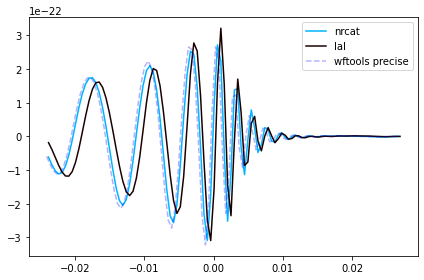

In [47]:
plt.plot(hpc.sample_times, hp1, color=[0,0.7071,1], label='nrcat')
plt.plot(hp2.sample_times, -hp2, color=[0.1,0,0], label='lal')
plt.plot(time, hwp, label='wftools precise', c='blue', alpha=0.3, linestyle='--')
#plt.scatter(time, -hwx2, label='wftools fast', s=4, c='magenta')
#plt.plot(hc1.sample_times, hc1)
plt.legend()
plt.show()

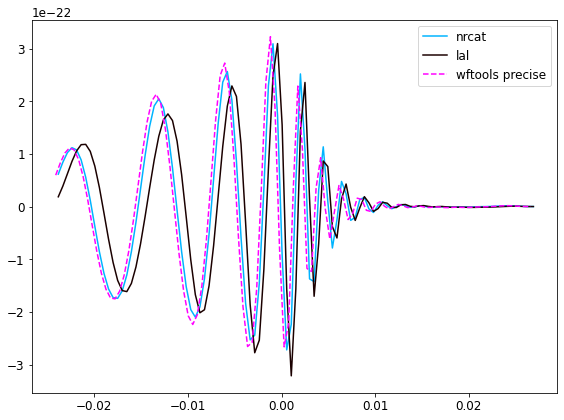

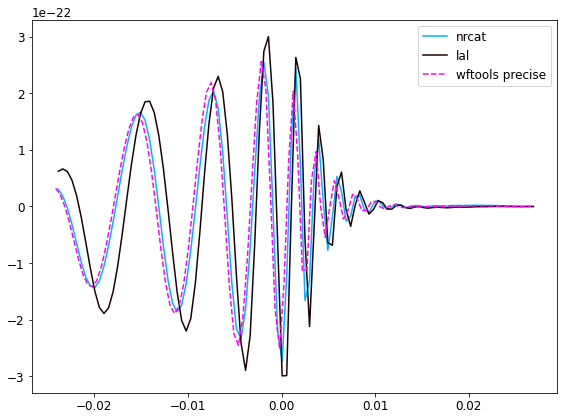

In [195]:
plt.plot(hpc.sample_times, -hp1, color=[0,0.7071,1], label='nrcat')
plt.plot(hp2.sample_times, hp2, color=[0.1,0,0], label='lal')
plt.plot(time, -hwp, label='wftools precise', c='magenta', linestyle='--')
#plt.scatter(time, hwp2, label='wftools fast', s=1)
#plt.plot(hc1.sample_times, hc1)
plt.legend()
plt.show()


plt.plot(hpc.sample_times, -hx1, color=[0,0.7071,1], label='nrcat')
plt.plot(hp2.sample_times, hx2, color=[0.1,0,0], label='lal')
plt.plot(time, hwx, label='wftools precise', c='magenta', linestyle='--')
#plt.scatter(time, hwp2, label='wftools fast', s=1)
#plt.plot(hc1.sample_times, hc1)
plt.legend()
plt.show()

###  Convention

LAL  : $h_+ + i h_\times$

Nrcat : $-h_+ - ih_\times$ 

Wftools : $-h_+ + i h_\times$

## Amplitude, phase differences

In [49]:
from waveformtools.waveformtools import roll

In [205]:
wf1 = np.array(hp1) + 1j*np.array(hx1)
wf2 = np.array(hp2) + 1j*np.array(hx2)
wf3 = hwp + 1j*hwx

a1, p1 = xtract_camp_phase(wf1.real, wf1.imag)
a2, p2 = xtract_camp_phase(wf2.real, wf2.imag)
a3, p3 = xtract_camp_phase(wf3.real, wf3.imag)

imax1, imax2, imax3 = np.argmax(a1), np.argmax(a2), np.argmax(a3)

print(imax1, imax2, imax3)

c = 0
if c<1:
    a2 = roll(a2, -3)
    p2 = roll(p2, -3)
    c=1

imax1, imax2, imax3 = np.argmax(a1), np.argmax(a2), np.argmax(a3)

print(imax1, imax2, imax3)
    
t2 = np.array(hp2.sample_times - hp2.sample_times[imax2])
t1 = np.array(hp1.sample_times - hp1.sample_times[imax1])
t3 = np.array(time - time[imax3])

47 50 47
47 47 47


In [206]:
type(t3), type(t2)

(numpy.ndarray, numpy.ndarray)

In [207]:
match_pwf_10 = match_wfs([t1, t2], [wf2, wf1])
match_pwf_20 = match_wfs([t1, t3], [wf3, wf1])

waveforms have a common time axis
-----------------------------------
 Shift information for waveform 2 against 1 

Recovered Time shift: 0.05126953125
Recovered Phase shift: (-0.78485106432861-0.6196844413265902j), (-2.4732520760891252-1.4611556353265987e-17j) in radians
-----------------------------------
waveforms have a common time axis
-----------------------------------
 Shift information for waveform 2 against 1 

Recovered Time shift: 0.05126953125
Recovered Phase shift: (0.8367571945233789-0.547574102212079j), (-0.5794623126537112-9.103861307847139e-17j) in radians
-----------------------------------


In [208]:
match_pwf_10['match_score'], match_pwf_20['match_score']

((0.9910591272769458+1.5190162346493882e-05j),
 (0.16305784282372499-0.00012598482111968005j))

In [210]:
match(hp1, hp2)

(0.991077759168201, 0)

In [211]:
delta_t

0.00048828125

In [212]:
hp3 = TimeSeries(a3*np.cos(p3), delta_t)
hx3 = TimeSeries(a3*np.sin(p3), delta_t)

In [213]:
match(hp3, hp2)

(0.987531623657514, 0)

TypeError: Can only convert a TimeSeries to a FrequencySeries

In [214]:
from pycbc.waveform.utils import coalign_waveforms

In [245]:
hp1_ca, hp2_ca_1 = coalign_waveforms(hp1, hp2) 
hx1_ca, hx2_ca_1 = coalign_waveforms(hx1, hx2) 

hp3_ca, hp2_ca_3 = coalign_waveforms(hp3, hp2) 
hx3_ca, hx3_ca_3 = coalign_waveforms(hx3, hx2) 


m10_ca = 100*(1 - match(hp1_ca, hp2_ca_1)[0])
m20_ca = 100*(1 - match(hp3_ca, hp2_ca_1)[0])

In [246]:
len(hp2), len(hp2_ca)

(105, 128)

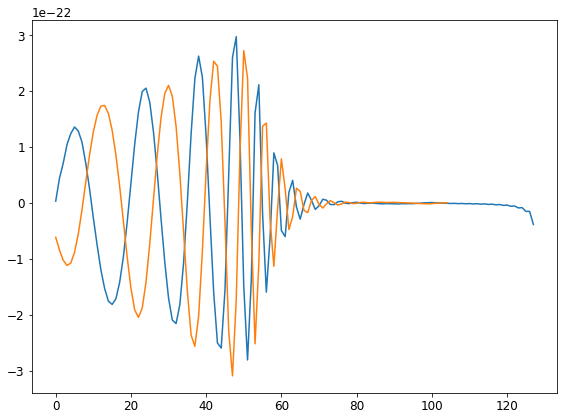

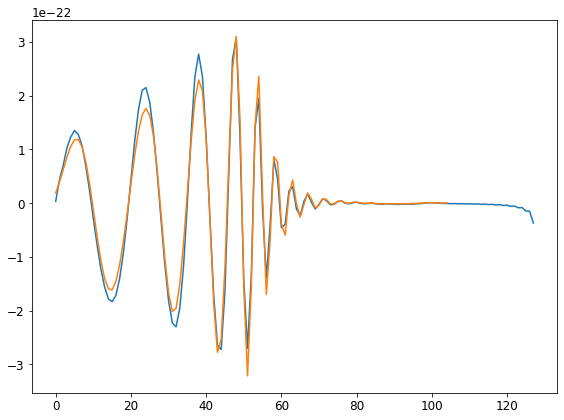

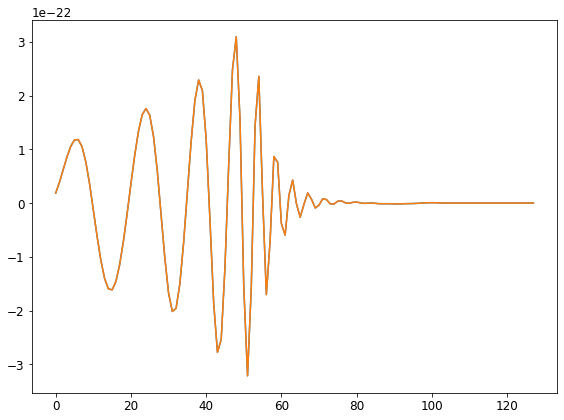

In [247]:
plt.plot(hp1_ca)
plt.plot(hp1)
plt.show()


plt.plot(hp3_ca)
plt.plot(hp2)
plt.show()



plt.plot(hp2_ca_1)
plt.plot(hp2_ca_3)
plt.show()

In [248]:
hp1_ca = np.array(hp1_ca)
hx1_ca = np.array(hx1_ca)
h1_ca = hp1_ca + 1j*hx1_ca
n1 = np.linalg.norm(h1_ca)

h2 = hp2_ca_1 + 1j*hx2_ca_1
n2 = np.linalg.norm(h2)

hp3_ca = np.array(hp3_ca)
hx3_ca = np.array(hx3_ca)
h3_ca = hp3_ca + 1j*hx3_ca
n3 = np.linalg.norm(h3_ca)

In [249]:
n1, n2, n3

(1.5812827989203587e-21, 1.681929903672688e-21, 1.5883777777831057e-21)

In [250]:
ratio_10_ca = h1_ca/h2
ratio_20_ca = h3_ca/h2

amp_10_ca = np.absolute(ratio_10_ca) - 1
amp_20_ca = np.absolute(ratio_20_ca) - 1

phase_10_ca = np.unwrap(np.angle(ratio_10_ca))
phase_20_ca = np.unwrap(np.angle(ratio_20_ca))

/home/vprasad/anaconda3/envs/nrcat/lib/python3.10/site-packages/pycbc/types/array.py:217: RuntimeWarning: divide by zero encountered in divide
  ret = getattr(ufunc, method)(*inputs, **kwargs)


In [251]:
ctime = hp2_ca_1.sample_times

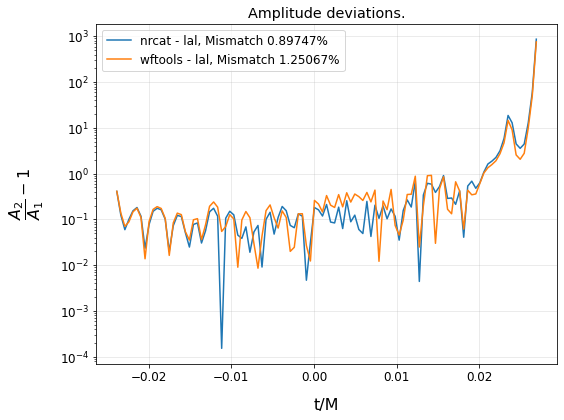

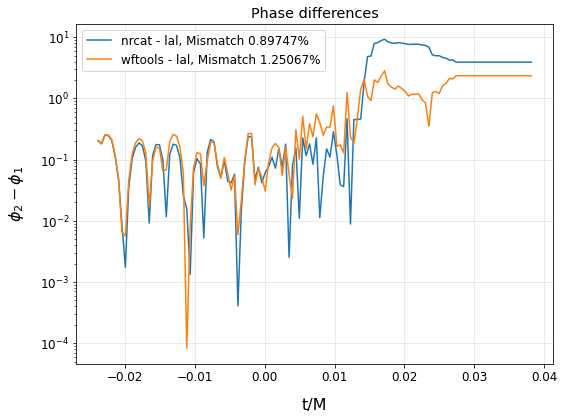

In [256]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(ctime, np.absolute(amp_10_ca), label=f'nrcat - lal, Mismatch {round(m10_ca, 5)}%')
ax.plot(ctime, np.absolute(amp_20_ca), label=f'wftools - lal, Mismatch {round(m20_ca, 5)}%')
#plt.plot(ctime, mode_22_lal_rs.real, label='lal')
plt.xlabel('t/M')
plt.ylabel(r'$\dfrac{A_2}{A_1} -1 $')
plt.title(f'Amplitude deviations.')
plt.legend()
plt.grid()
plt.savefig('pol_amp_deviation_resampled.png')
plt.show()


fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(ctime, np.absolute(phase_10_ca), label=f'nrcat - lal, Mismatch {round(m10_ca, 5)}%')
ax.plot(ctime, np.absolute(phase_20_ca), label=f'wftools - lal, Mismatch {round(m20_ca, 5)}%')
plt.xlabel('t/M')
plt.ylabel(r'$\phi_2 - \phi_1$')
#plt.plot(ctime, mode_22_lal_rs.real, label='lal')
plt.title('Phase differences')
plt.legend()
plt.grid()
plt.savefig('pol_phase_diff_resampled.png')
plt.show()


In [51]:
from waveformtools.waveformtools import xtract_camp_phase

In [52]:
np.amax(a1), np.amax(a2), np.amax(a3)
print('Max loc')
np.argmax(a1), np.argmax(a2), np.argmax(a3)

Max loc


(47, 47, 47)

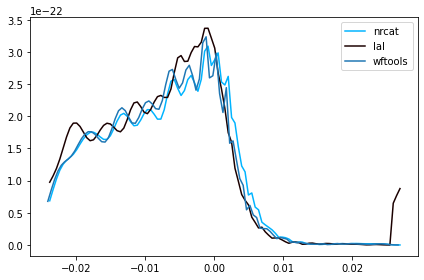

In [53]:
plt.plot(hpc.sample_times, a1, color=[0,0.7071,1], label='nrcat')
plt.plot(hp2.sample_times, a2, color=[0.1,0,0], label='lal')
plt.plot(time, a3, label='wftools')
#plt.plot(hc1.sample_times, hc1)
plt.legend()
plt.show()

In [54]:
da_12 = a1/a2 - 1
da_32 = a3/a2 - 1

In [55]:
dp_12 = p1 - p2
dp_32 = -p3 - p2 

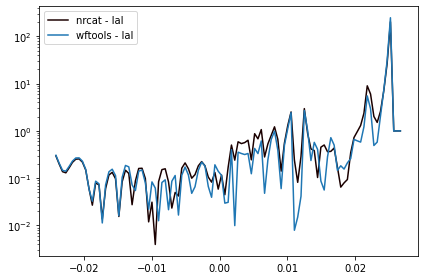

In [56]:
fig, ax = plt.subplots()
ax.set_yscale('log')

#plt.plot(hpc.sample_times, hp1, color=[0,0.7071,1], label='nrcat')
plt.plot(time, np.absolute(da_12), color=[0.1,0,0], label='nrcat - lal')
plt.plot(time, np.absolute(da_32), label='wftools - lal')
#plt.scatter(time, np.absolute(dwf_132), label='nrcat - wftools fast', s=1, c='orange')
#plt.plot(hc1.sample_times, hc1)
plt.legend()
plt.show()

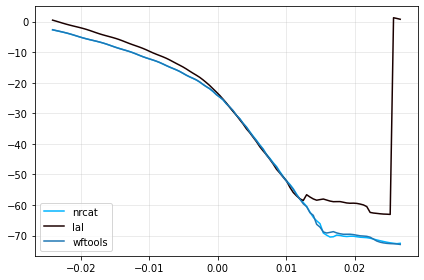

In [57]:
fig, ax = plt.subplots()
#ax.set_yscale('log')

plt.plot(time, p1, color=[0,0.7071,1], label='nrcat')
plt.plot(time, p2, color=[0.1,0,0], label='lal')
plt.plot(time, -p3, label='wftools')
plt.grid()
#plt.scatter(time, np.absolute(dwf_132), label='nrcat - wftools fast', s=1, c='orange')
#plt.plot(hc1.sample_times, hc1)
plt.legend()
plt.show()

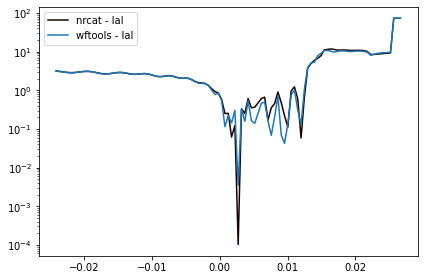

In [58]:
fig, ax = plt.subplots()
ax.set_yscale('log')

#plt.plot(hpc.sample_times, hp1, color=[0,0.7071,1], label='nrcat')
plt.plot(time, np.absolute(dp_12), color=[0.1,0,0], label='nrcat - lal')
plt.plot(time, np.absolute(dp_32), label='wftools - lal')
#plt.scatter(time, np.absolute(dwf_132), label='nrcat - wftools fast', s=1, c='orange')
#plt.plot(hc1.sample_times, hc1)
plt.legend()
plt.show()

hp2_ts = TimeSeries(hp2, delta_t=delta_t)
hx2_ts = TimeSeries(hx2, delta_t=delta_t)

mp, sp = match(hp1, hp2_ts)
mx, sx = match(hx1, hx2_ts)

wf1_p, wf2_p = coalign_waveforms(hp1, hp2_ts)
wf1_x, wf2_x = coalign_waveforms(hx1, hx2_ts)

### After alignment

# Pycbc matches

In [59]:
from pycbc.types.timeseries import TimeSeries
from pycbc.filter.matchedfilter import match

In [60]:
hp3 = TimeSeries(hwp, delta_t=delta_t)
hx3 = TimeSeries(hwx, delta_t=delta_t)

hp4 = TimeSeries(hwp2, delta_t=delta_t)
hx4 = TimeSeries(hwx2, delta_t=delta_t)

mp_12, sp_12 = match(hp1, hp2)
mp_32, sp_32 = match(hp3, hp2)
mp_42, sp_32 = match(hp4, hp2)

mp_13, sp_13 = match(hp1, hp3)

print(f'nrcat-lal {mp_12}', f'wftools prec - lal {mp_32}', f'wftools fast - lal {mp_42}')

nrcat-lal 0.991077759168201 wftools prec - lal 0.9875316236575142 wftools fast - lal 0.987531623657514


In [61]:
(1-mp_12)*100, (1-mp_32)*100, (1-mp_42)*100

(0.8922240831799044, 1.2468376342485765, 1.2468376342485987)

In [62]:
100*(1-mp_13)

0.17884251361859338

In [ ]:


#mx_, sx = match(hx1, hx2_ts)

wf1_p, wf2_p = coalign_waveforms(hp1, hp2_ts)
wf1_x, wf2_x = coalign_waveforms(hx1, hx2_ts)

# Normalize the arrays
wf1 = np.array(wf1_p) + 1j*np.array(wf1_x)
wf2 = np.array(wf2_p) + 1j*np.array(wf2_x)

n1 = np.sqrt(np.dot(wf1, np.conjugate(wf1)))
n2 = np.sqrt(np.dot(wf2, np.conjugate(wf2)))

wf1 = wf1/n1
wf2 = wf2/n2

wf1_p = wf1.real
wf1_x = wf1.imag

wf2_p = wf2.real
wf2_x = wf2.imag

wf1_p = TimeSeries(wf1_p, delta_t)
wf1_x = TimeSeries(wf1_x, delta_t)
wf2_p = TimeSeries(wf2_p, delta_t)
wf2_x = TimeSeries(wf2_x, delta_t)

In [ ]:
mp

In [ ]:
np.amax(wf2/wf1)

In [ ]:
plt.plot(wf2_p.sample_times, wf2_p, color=[0,0.7071,1], label='lal')
#plt.plot(t, hc2, color=[0.1,0,0])
plt.plot(wf1_p.sample_times, wf1_p, label='nrcat')
#plt.plot(hc1.sample_times, hc1)
plt.legend()
plt.show()

In [ ]:
dwf_p = np.array(wf1_p) - np.array(wf2_p)
dwf_x = np.array(wf1_x) - np.array(wf2_x)

In [ ]:
#plt.plot(wf2.sample_times, wf2, color=[0,0.7071,1], label='lal')
#plt.plot(t, hc2, color=[0.1,0,0])
plt.plot(wf1_p.sample_times, dwf_p, label='diff +')
plt.plot(wf1_p.sample_times, dwf_x, label='diff x')
#plt.plot(hc1.sample_times, hc1)
plt.legend()
plt.show()

# 4: Test Modes data from LAL

In [64]:
lal_modes = np.genfromtxt('/home/vprasad/Modes_data.dat')

In [65]:
n1, _ = lal_modes.shape

In [77]:
# All the time indices
tind_all = set(lal_modes[:, 0])

In [78]:
len(tind_all)

105

These waveform modes from lal have already been resampled at user specified delta_t

## Load the ell, emm mode

In [82]:
ell = 2
emm = 2

# The lal time axis
taxis_lal_rs = []
# The lal mode axis
mode_22_lal_rs = []

# Load
for index in range(n1):
    tindex, ell_val, emm_val, Yslm_re, Yslm_im, Clm_re, Clm_im = lal_modes[index, :]
    
    if int(ell_val)==ell and int(emm_val)==emm:
        #print(tindex)
        Clm = Clm_re + 1j*Clm_im
    
        taxis_lal_rs.append(tindex*delta_t)
        mode_22_lal_rs.append(Clm)

In [83]:
ell, emm

(2, 2)

## Load and recenter the modes

/home/vprasad/anaconda3/envs/nrcat/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


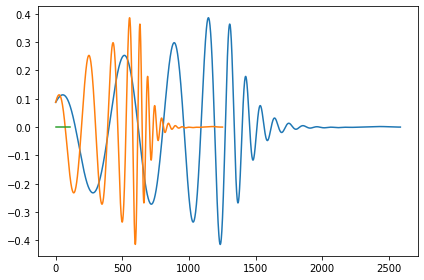

In [105]:
plt.plot(mode_22_wf)
plt.plot(mode_22_nrcat)
#plt.plot(mode_22_lal_rs)
plt.show()

In [147]:
# waveformtools mode
wf_time = wfm.time_axis
mode_22_wf = wfm.mode(ell, emm)

mtime = wf_time[np.argmax(np.absolute(mode_22_wf))]
wftime-=mtime


nrcat_time = mwf.time
mode_22_nrcat = mwf.get_mode(ell, emm)[:, 1] + 1j* mwf.get_mode(ell, emm)[:, 2]

mtime = nrcat_time[np.argmax(np.absolute(mode_22_nrcat))]
nrcat_time-=mtime


lal_time = taxis_lal_rs
mtime = lal_time[np.argmax(np.absolute(mode_22_lal_rs))]
lal_time-=mtime

mode_22_lal_rs = np.array(mode_22_lal_rs)

In [148]:
lal_time

array([-0.02392578, -0.0234375 , -0.02294922, -0.02246094, -0.02197266,
       -0.02148438, -0.02099609, -0.02050781, -0.02001953, -0.01953125,
       -0.01904297, -0.01855469, -0.01806641, -0.01757812, -0.01708984,
       -0.01660156, -0.01611328, -0.015625  , -0.01513672, -0.01464844,
       -0.01416016, -0.01367188, -0.01318359, -0.01269531, -0.01220703,
       -0.01171875, -0.01123047, -0.01074219, -0.01025391, -0.00976562,
       -0.00927734, -0.00878906, -0.00830078, -0.0078125 , -0.00732422,
       -0.00683594, -0.00634766, -0.00585938, -0.00537109, -0.00488281,
       -0.00439453, -0.00390625, -0.00341797, -0.00292969, -0.00244141,
       -0.00195312, -0.00146484, -0.00097656, -0.00048828,  0.        ,
        0.00048828,  0.00097656,  0.00146484,  0.00195312,  0.00244141,
        0.00292969,  0.00341797,  0.00390625,  0.00439453,  0.00488281,
        0.00537109,  0.00585938,  0.00634766,  0.00683594,  0.00732422,
        0.0078125 ,  0.00830078,  0.00878906,  0.00927734,  0.00

In [149]:
lal_dt = np.diff(lal_time)[0]
wf_dt =wfm.delta_t()*wfm.data_len/len(lal_time)

In [150]:
dt_ratio=wf_dt/lal_dt

In [151]:
lal_time*=dt_ratio

In [152]:
lal_time

array([-120.77333333, -118.30857143, -115.84380952, -113.37904762,
       -110.91428571, -108.44952381, -105.9847619 , -103.52      ,
       -101.0552381 ,  -98.59047619,  -96.12571429,  -93.66095238,
        -91.19619048,  -88.73142857,  -86.26666667,  -83.80190476,
        -81.33714286,  -78.87238095,  -76.40761905,  -73.94285714,
        -71.47809524,  -69.01333333,  -66.54857143,  -64.08380952,
        -61.61904762,  -59.15428571,  -56.68952381,  -54.2247619 ,
        -51.76      ,  -49.2952381 ,  -46.83047619,  -44.36571429,
        -41.90095238,  -39.43619048,  -36.97142857,  -34.50666667,
        -32.04190476,  -29.57714286,  -27.11238095,  -24.64761905,
        -22.18285714,  -19.71809524,  -17.25333333,  -14.78857143,
        -12.32380952,   -9.85904762,   -7.39428571,   -4.92952381,
         -2.4647619 ,    0.        ,    2.4647619 ,    4.92952381,
          7.39428571,    9.85904762,   12.32380952,   14.78857143,
         17.25333333,   19.71809524,   22.18285714,   24.64761

In [153]:
nrcat_time

array([-122.55333333, -122.34666667, -122.14      , ...,  135.78      ,
        135.98666667,  136.19333333])

In [154]:
wf_time

array([-122.5, -122.4, -122.3, ...,  136. ,  136.1,  136.2])

### Resample wftools and nrcat to lal rs

In [155]:
from waveformtools.waveformtools import interp_resam_wfs

In [258]:
tmin = max(wf_time[0], nrcat_time[0], lal_time[0])
tmax = min(wf_time[-1], nrcat_time[-1], lal_time[-1])

ctime = np.linspace(tmin, tmax, len(lal_time))

In [259]:
mode_22_wf_rs = interp_resam_wfs(wavf_data=mode_22_wf, old_taxis=wf_time, new_taxis=ctime, k=None)
mode_22_nrcat_rs = interp_resam_wfs(wavf_data=mode_22_nrcat, old_taxis=nrcat_time, new_taxis=ctime, k=None)

In [260]:
n_mode22_lal = np.linalg.norm(mode_22_lal_rs)
n_mode22_wf= np.linalg.norm(mode_22_wf_rs)
n_mode22_nrcat= np.linalg.norm(mode_22_nrcat_rs)

In [261]:
np.argmax(mode_22_lal_rs), np.argmax(mode_22_wf_rs), np.argmax(mode_22_nrcat_rs)

(46, 46, 46)

In [262]:
mode_22_nrcat_rs/=n_mode22_nrcat
mode_22_wf_rs/=n_mode22_wf
mode_22_lal_rs/=n_mode22_lal

In [263]:
n_mode22_lal_rs, n_mode22_wf, n_mode22_nrcat

(4.167552524817346e-21, 2.18203729028601, 2.1819957210297107)

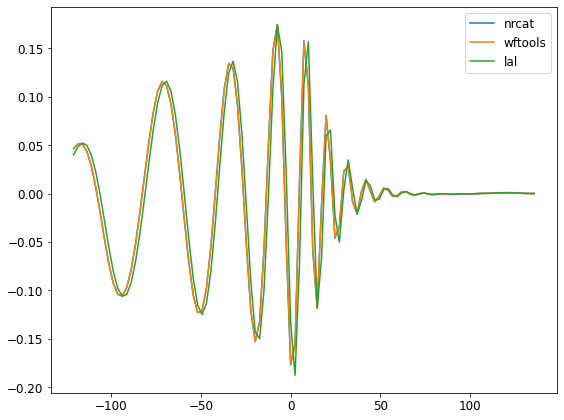

In [264]:
plt.plot(ctime, mode_22_nrcat_rs.real, label='nrcat')
plt.plot(ctime, mode_22_wf_rs.real, label='wftools')
plt.plot(ctime, mode_22_lal_rs.real, label='lal')
plt.legend()
plt.show()




In [265]:
ratio_10 = mode_22_nrcat_rs/mode_22_lal_rs
ratio_20 = mode_22_wf_rs/mode_22_lal_rs

amp_10 = np.absolute(ratio_10) - 1
amp_20 = np.absolute(ratio_20) - 1

phase_10 = np.unwrap(np.angle(ratio_10))
phase_20 = np.unwrap(np.angle(ratio_20))

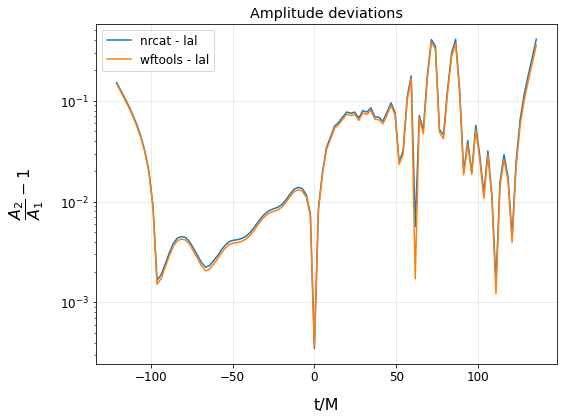

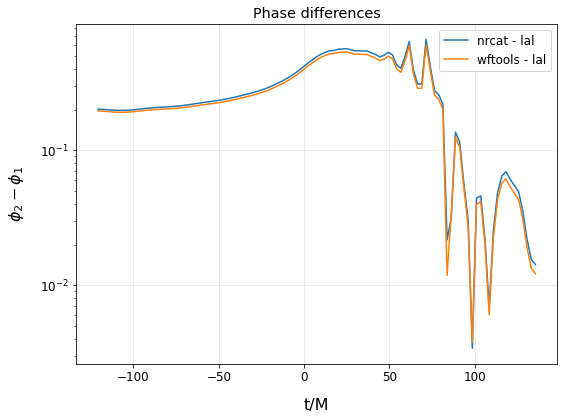

In [266]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(ctime, np.absolute(amp_10), label='nrcat - lal')
ax.plot(ctime, np.absolute(amp_20), label='wftools - lal')
#plt.plot(ctime, mode_22_lal_rs.real, label='lal')
plt.xlabel('t/M')
plt.ylabel(r'$\dfrac{A_2}{A_1} -1 $')
plt.title('Amplitude deviations (2, 2) mode')
plt.legend()
plt.grid()
plt.savefig('amp_deviation_resampled.png')
plt.show()


fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(ctime, np.absolute(phase_10), label='nrcat - lal')
ax.plot(ctime, np.absolute(phase_20), label='wftools - lal')
plt.xlabel('t/M')
plt.ylabel(r'$\phi_2 - \phi_1$')
#plt.plot(ctime, mode_22_lal_rs.real, label='lal')
plt.title('Phase differences (2, 2)')
plt.legend()
plt.grid()
plt.savefig('phase_diff_resampled.png')
plt.show()


## With coaligned waveforms

In [267]:
from waveformtools.waveformtools import match_wfs

In [268]:
match_10 = match_wfs([ctime, ctime], [mode_22_nrcat_rs, mode_22_lal_rs])
match_20 = match_wfs([ctime, ctime], [mode_22_wf_rs, mode_22_lal_rs])

waveforms have a common time axis
-----------------------------------
 Shift information for waveform 2 against 1 

Recovered Time shift: 258.7999999999846
Recovered Phase shift: (0.9501338559046079-0.31184235739206734j), (-0.3171314673840885+6.377397258214507e-18j) in radians
-----------------------------------
waveforms have a common time axis
-----------------------------------
 Shift information for waveform 2 against 1 

Recovered Time shift: 258.7999999999846
Recovered Phase shift: (0.954406904836354-0.2985087268417635j), (-0.3031297584276465+3.320362220682867e-17j) in radians
-----------------------------------


/home/vprasad/Documents/Projects/waveformtools/waveformtools/waveformtools.py:2461: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta_t = mode(np.diff(sorted(time_axis1)))[0][0]


In [269]:
match_10['match_score'], match_20['match_score']

((0.9936255375408124+7.978636497631489e-05j),
 (0.9943814264039618+7.583876739757772e-05j))

In [270]:
msm10 = 100*(1-match_10['match_score']).real
msm20 = 100*(1-match_20['match_score']).real

In [271]:
mode_22_nrcat_rs_al, mode_22_lal_rs_al_1 = match_10['aligned_waveforms']
mode_22_wf_rs_al, mode_22_lal_rs_al_2 = match_20['aligned_waveforms']

In [272]:
ratio_10_al = mode_22_nrcat_rs_al/mode_22_lal_rs_al_1
ratio_20_al = mode_22_wf_rs_al/mode_22_lal_rs_al_2

amp_10_al = np.absolute(ratio_10_al) - 1
amp_20_al = np.absolute(ratio_20_al) - 1

phase_10_al = np.unwrap(np.angle(ratio_10_al))
phase_20_al = np.unwrap(np.angle(ratio_20_al))

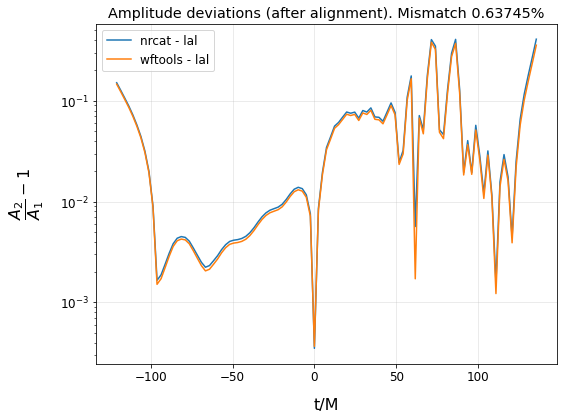

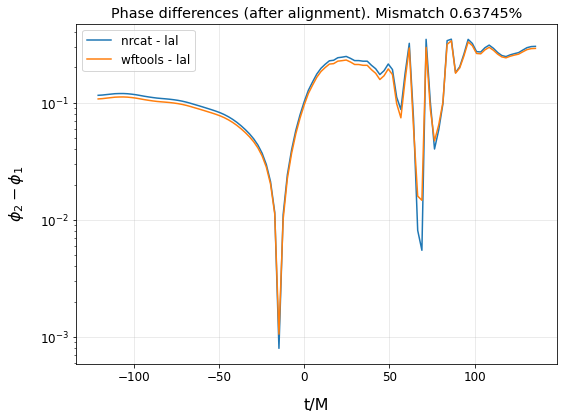

In [273]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(ctime, np.absolute(amp_10_al), label='nrcat - lal')
ax.plot(ctime, np.absolute(amp_20_al), label='wftools - lal')
#plt.plot(ctime, mode_22_lal_rs.real, label='lal')
plt.xlabel('t/M')
plt.ylabel(r'$\dfrac{A_2}{A_1} -1 $')
plt.title(f'Amplitude deviations (after alignment). Mismatch {round(msm10, 5)}%')
plt.legend()
plt.grid()
plt.savefig('amp_deviation_resampled_aligned.png')
plt.show()


fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(ctime, np.absolute(phase_10_al), label='nrcat - lal')
ax.plot(ctime, np.absolute(phase_20_al), label='wftools - lal')
plt.xlabel('t/M')
plt.ylabel(r'$\phi_2 - \phi_1$')
#plt.plot(ctime, mode_22_lal_rs.real, label='lal')
plt.title(f'Phase differences (after alignment). Mismatch {round(msm10, 5)}%')
plt.legend()
plt.grid()
plt.savefig('phase_diff_resampled_aligned.png')
plt.show()


NameError: name 'taxis' is not defined

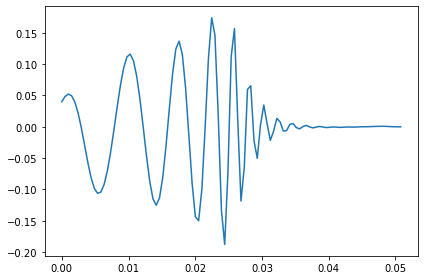

In [76]:
plt.plot(taxis_lal_rs, np.array(mode_22_lal_rs).real/nmode22_lal_rs, label='lal')
plt.plot(taxis, mode_22_wf_rs/nmode22_wf, label='wftools', linestyle='--')
plt.legend()
plt.show()


plt.plot(taxis, np.absolute(np.array(mode_22_lal_rs)/nmode22_lal_rs), label='lal')
plt.plot(taxis, np.absolute(mode_22_wf_rs/nmode22_wf), label='wftools', linestyle='--')
plt.legend()
plt.show()

In [133]:
rat = np.array(mode_22_lal_rs)/mode_22_wf_rs
ph = np.unwrap(np.angle(np.array(mode_22_lal_rs)/mode_22_wf_rs))

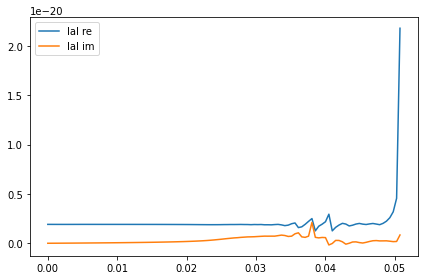

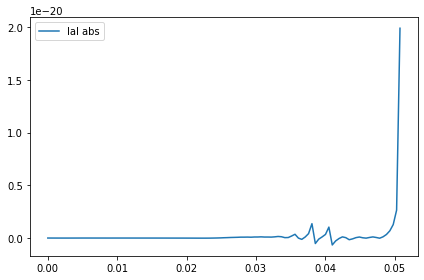

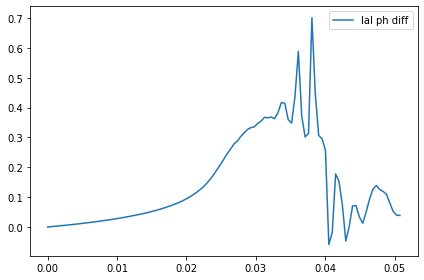

In [137]:
plt.plot(taxis, rat.real, label='lal re')
plt.plot(taxis, rat.imag, label='lal im')
#plt.plot(taxis, mode_22_wf_rs/nmode22_wf, label='wftools', linestyle='--')
plt.legend()
plt.show()

plt.plot(taxis, np.absolute(rat) - np.mean(np.absolute(rat)[15:50]), label='lal abs')
#lt.plot(taxis, rat.imag, label='lal im')
#plt.plot(taxis, mode_22_wf_rs/nmode22_wf, label='wftools', linestyle='--')
plt.legend()
plt.show()


plt.plot(taxis, ph, label='lal ph diff')
#lt.plot(taxis, rat.imag, label='lal im')
#plt.plot(taxis, mode_22_wf_rs/nmode22_wf, label='wftools', linestyle='--')
plt.legend()
plt.show()

# Compare lal modes

In [76]:
mdata = np.genfromtxt('/home/vaishakprasad/raw_hlm.dat', dtype=None)

<ipython-input-76-76021d88b9c1>:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  mdata = np.genfromtxt('/home/vaishakprasad/raw_hlm.dat', dtype=None)


In [77]:
mdata.shape

(34382,)

In [78]:
len(mwf.time)

1253

In [79]:
mdata[0]

(b'amp_l2_m-2', -121.10666667, 0.08866652)

In [80]:
n2

NameError: name 'n2' is not defined

In [81]:
n2 = mdata.shape[0]

taxis_amp = []
taxis_phase = []
mode_amp_22 = []
mode_phase_22 = []

for index in range(n2):
    key, X, Y = mdata[index]
    key = str(key)
    # print(X)
    #print(key)
    if 'l2' in key and 'm2' in key:
        #print(key)
        if 'amp' in key:
            taxis_amp.append(X)
            mode_amp_22.append(Y)
        elif 'phase' in key:
            taxis_phase.append(X)
            mode_phase_22.append(Y)
mode_amp_22 = np.array(mode_amp_22)
mode_phase_22 = np.array(mode_phase_22)



In [82]:
a2 = np.amax(mode_amp_22)

In [83]:
a1 = np.amax(np.absolute(mwf.get_mode(2, 2)))

In [84]:
a1/a2

331.74386512541

In [85]:
w22 = np.array(mode_amp_22) * np.exp(1j*np.array(mode_phase_22))

ValueError: operands could not be broadcast together with shapes (169,) (291,) 

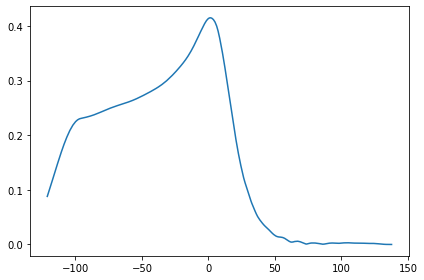

In [86]:
plt.plot(taxis_amp, mode_amp_22)
plt.show()

In [ ]:
len(taxis_amp)

In [ ]:
len(mwf.time)

In [100]:
with h5py.File(str(fdir) + '/data/'+ fname) as f:
    pdata_X = np.array(f['amp_l2_m2']['X'])
    pdata_Y = np.array(f['amp_l2_m2']['Y'])
    
    adata_X = np.array(f['amp_l2_m2']['X'])
    adata_Y = np.array(f['amp_l2_m2']['Y'])

In [103]:
len(adata_X), len(mode_amp_22)

(169, 169)

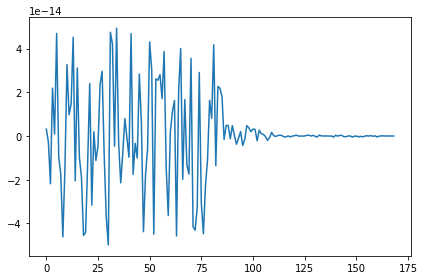

In [105]:
plt.plot(mode_amp_22 - adata_Y)

## Load from LAL intercept

In [110]:
errs_amp  = []
errs_phase = []

for ell in range(2, 7):
    for emm in range(-ell, ell+1):
#for ell in range(2, 7):
#    for emm in range(-ell, ell+1):
        n2 = mdata.shape[0]

        taxis_amp = []
        taxis_phase = []
        mode_amp_lm = []
        mode_phase_lm = []

        for index in range(n2):
            key, X, Y = mdata[index]
            key = str(key)
            # print(X)
            #print(key)
            if f'l{ell}' in key and f'm{emm}' in key:
                #print(key)
                if 'amp' in key:
                    taxis_amp.append(X)
                    mode_amp_lm.append(Y)
                elif 'phase' in key:
                    taxis_phase.append(X)
                    mode_phase_lm.append(Y)

        mode_amp_lm = np.array(mode_amp_lm)
        mode_phase_lm = np.array(mode_phase_lm)

        with h5py.File(str(fdir) + '/data/'+ fname) as f:
            pdata_X = np.array(f[f'phase_l{ell}_m{emm}']['X'])
            pdata_Y = np.array(f[f'phase_l{ell}_m{emm}']['Y'])

            adata_X = np.array(f[f'amp_l{ell}_m{emm}']['X'])
            adata_Y = np.array(f[f'amp_l{ell}_m{emm}']['Y'])

        damp = mode_amp_lm - adata_Y
        dphase = mode_phase_lm - pdata_Y

        errs_amp.append(np.amax(np.absolute(damp)))
        errs_phase.append(np.amax(np.absolute(dphase)))

        #plt.plot(damp)
        #plt.title(f'Amp l{ell} m{emm}')
        #plt.show()

        #plt.plot(dphase)
        #plt.title(f'Phase l{ell} m{emm}')
        #plt.show()

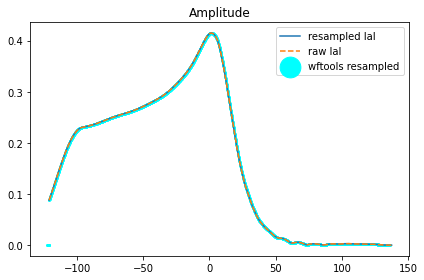

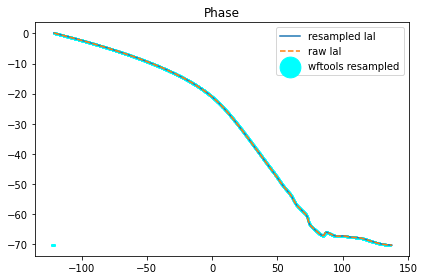

1232 1232 1232 1232


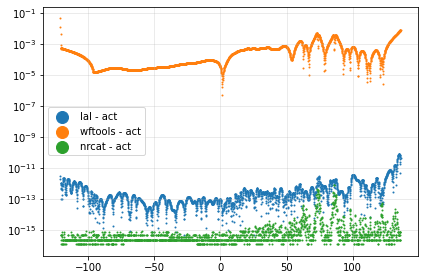

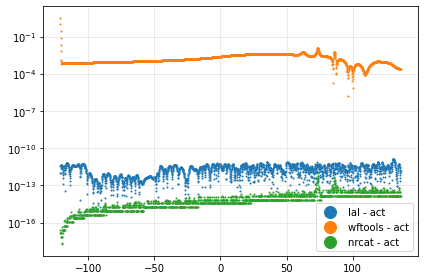

In [194]:
errs_amp  = []
errs_phase = []

for ell in range(2, 3):
    for emm in range(2, 3):
#for ell in range(2, 7):
#    for emm in range(-ell, ell+1):

        time_wftools = wfm.time_axis
        wf_nrcat = mwf.get_mode(2, 2)[:, 1] + 1j*mwf.get_mode(2, 2)[:, 2]
        
        amp_wftools = roll(np.absolute(wfm.mode(2, 2)), 14)
        phase_wftools = roll(np.unwrap(np.angle(wfm.mode(2, 2))), 14)
    
        time_nrcat = mwf.time
        amp_nrcat = roll(np.absolute(wf_nrcat), 0)
        phase_nrcat = roll(np.unwrap(np.angle(wf_nrcat)), 0)
        
        n2 = mdata.shape[0]

        taxis_amp = []
        taxis_phase = []
        mode_amp_lm = []
        mode_phase_lm = []

        for index in range(n2):
            key, X, Y = mdata[index]
            key = str(key)
            # print(X)
            #print(key)
            if f'l{ell}' in key and f'm{emm}' in key:
                #print(key)
                if 'amp' in key:
                    taxis_amp.append(X)
                    mode_amp_lm.append(Y)
                elif 'phase' in key:
                    taxis_phase.append(X)
                    mode_phase_lm.append(Y)

        mode_amp_lm = np.array(mode_amp_lm)
        mode_phase_lm = np.array(mode_phase_lm)

        with h5py.File(str(fdir)+ fname) as f:
            pdata_X = np.array(f[f'phase_l{ell}_m{emm}']['X'])
            pdata_Y = np.array(f[f'phase_l{ell}_m{emm}']['Y'])

            adata_X = np.array(f[f'amp_l{ell}_m{emm}']['X'])
            adata_Y = np.array(f[f'amp_l{ell}_m{emm}']['Y'])

        damp = mode_amp_lm - adata_Y
        dphase = mode_phase_lm - pdata_Y

        errs_amp.append(np.amax(np.absolute(damp)))
        errs_phase.append(np.amax(np.absolute(dphase)))

        #plt.plot(damp)
        #plt.title(f'Amp l{ell} m{emm}')
        #plt.show()

        #plt.plot(dphase)
        #plt.title(f'Phase l{ell} m{emm}')
        #plt.show()
        
        plt.plot(taxis_amp, mode_amp_lm, label='resampled lal')
        plt.plot(adata_X, adata_Y, label='raw lal', linestyle='--')
        plt.scatter(time_wftools, amp_wftools, label='wftools resampled',s=3, c='cyan')
        plt.title('Amplitude')
        plt.legend()
        #plt.plot()
        plt.show()
        
        #plt.scatter(taxis_amp, mode_amp_lm, label='resampled lal', s=1)
        #plt.scatter(adata_X, adata_Y, label='raw lal', linestyle='--', s=1)
        #plt.plot()
        #plt.show()
        
        plt.plot(taxis_phase, mode_phase_lm, label='resampled lal')
        plt.plot(pdata_X, pdata_Y, label='raw lal', linestyle='--')
        plt.scatter(time_wftools, phase_wftools, label='wftools resampled',s=3, c='cyan')
        plt.title('Phase')
        plt.legend()
        #plt.plot()
        plt.show()
        
        
        from scipy.interpolate import interp1d
        
        tmin = max(time_nrcat[0], time_wftools[0], adata_X[0], pdata_X[0])
        tmax = min(time_nrcat[-1], time_wftools[-1], adata_X[-1], pdata_X[-1])
        
        ctaxis = np.linspace(tmin, tmax, wfm.data_len)
        
        #time_wftools +=0.9
        adata_Y_rs = interp1d(adata_X, adata_Y, kind='cubic')(ctaxis)
        mode_amp_lm_rs = interp1d(taxis_amp, mode_amp_lm, kind='cubic')(ctaxis)
        amp_wftools_rs = interp1d(time_wftools, amp_wftools, kind='cubic')(ctaxis)
        amp_nrcat_rs = interp1d(time_nrcat, amp_nrcat, kind='cubic')(ctaxis)
        
        damp_30 = amp_nrcat_rs/adata_Y_rs - 1
        damp_20 = mode_amp_lm_rs/adata_Y_rs  -1
        damp_10 = amp_wftools_rs/adata_Y_rs - 1
        
        pdata_Y_rs = interp1d(pdata_X, pdata_Y, kind='cubic')(ctaxis)
        mode_phase_lm_rs = interp1d(taxis_phase, mode_phase_lm, kind='cubic')(ctaxis)
        phase_wftools_rs = interp1d(time_wftools, phase_wftools, kind='cubic')(ctaxis)
        phase_nrcat_rs = interp1d(time_nrcat, phase_nrcat, kind='cubic')(ctaxis)
        
        dphase_30 = phase_nrcat_rs - pdata_Y_rs
        dphase_20 = mode_phase_lm_rs - pdata_Y_rs
        dphase_10 = phase_wftools_rs - pdata_Y_rs
        
        print(np.argmax(amp_nrcat_rs), np.argmax(amp_wftools_rs), np.argmax(adata_Y_rs), np.argmax(mode_amp_lm_rs))
        
        fig,ax = plt.subplots()
        ax.set_yscale('log')
        
        ax.scatter(ctaxis, np.absolute(damp_20), label='lal - act', s=1)
        ax.scatter(ctaxis, np.absolute(damp_10), label='wftools - act', s=1)
        ax.scatter(ctaxis, np.absolute(damp_30), label='nrcat - act', s=1)
        plt.grid()
        plt.legend()
        plt.show()
        
        fig,ax = plt.subplots()
        ax.set_yscale('log')
        ax.scatter(ctaxis, np.absolute(dphase_20), label='lal - act', s=1)
        ax.scatter(ctaxis, np.absolute(dphase_10), label='wftools - act', s=1)
        ax.scatter(ctaxis, np.absolute(dphase_30), label='nrcat - act', s=1)
        plt.grid()
        plt.legend()
        plt.show()

In [199]:
wf0 = adata_Y_rs*np.exp(1j*pdata_Y_rs)
wf1 = mode_amp_lm_rs*np.exp(1j*mode_phase_lm_rs) 
wf2 = amp_nrcat_rs*np.exp(1j*phase_nrcat_rs)
wf3 = amp_wftools_rs*np.exp(1j*phase_wftools_rs)

det30 = match_wfs([ctaxis, ctaxis], [wf3, wf0])
det20 = match_wfs([ctaxis, ctaxis], [wf2, wf0])
det10 = match_wfs([ctaxis, ctaxis], [wf1, wf0])

waveforms have a common time axis
-----------------------------------
 Shift information for waveform 2 against 1 

Recovered Time shift: 257.3066666666602
Recovered Phase shift: (0.9997045121078756-0.02430819761220916j), (-0.02431059215459279+1.1148322742950593e-16j) in radians
-----------------------------------
waveforms have a common time axis
-----------------------------------
 Shift information for waveform 2 against 1 

Recovered Time shift: 257.40612807627235
Recovered Phase shift: (0.9999999999999999+6.658816828485268e-16j), (6.658816828485269e-16+1.1102230246251544e-16j) in radians
-----------------------------------
waveforms have a common time axis
-----------------------------------
 Shift information for waveform 2 against 1 

Recovered Time shift: 257.40612807627235
Recovered Phase shift: (1-2.3238795101639753e-13j), (-2.3238795101639753e-13-2.700207988879979e-26j) in radians
-----------------------------------


In [196]:
from waveformtools.waveformtools import match_wfs

waveforms have a common time axis
-----------------------------------
 Shift information for waveform 2 against 1 

Recovered Time shift: 257.3066666666602
Recovered Phase shift: (0.9997045121078756-0.02430819761220916j), (-0.02431059215459279+1.1148322742950593e-16j) in radians
-----------------------------------


/home/vaishakprasad/Documents/Codes/waveformtools/waveformtools/waveformtools.py:2461: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta_t = mode(np.diff(sorted(time_axis1)))[0][0]


In [200]:
det30['match_score'], det20['match_score'], det10['match_score']

((0.9998654335710343+3.6651840174162405e-06j),
 (1-3.932730178533955e-16j),
 (1+7.106209500040779e-16j))

In [ ]:
det

In [ ]:
np.argmax(mode_am)

In [144]:
time_wftools[0], taxis_amp[0], taxis_phase[0], adata_X[0], pdata_X[0]

(-121.933333333333,
 -121.1066666667,
 -121.1066666667,
 -121.10666666666697,
 -121.10666666666697)

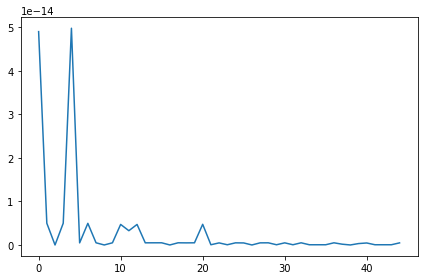

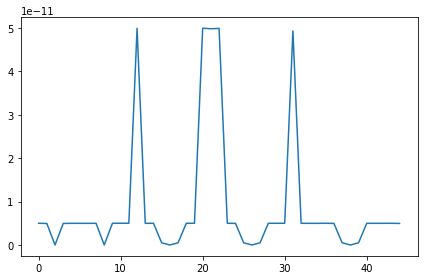

In [112]:
plt.plot(errs_amp)
plt.show()

plt.plot(errs_phase)
plt.show()

## Test spherical harmonics

# Tests

In [ ]:
def RMSerrs(func1, func2):
    ''' Compute and return the error estimates between two arrays
    
    Parameters
    ----------
    func1, func2 : ndarray
                   Arrays of same shape to compare with.
    info : sphericalarray
           Grid info
    
    Returns
    -------
    RMS : float
          The RMS error
    Amax : float
           The max diff relative to A1max
    Amin : float the min diff relative to A2max
    '''
    A1max = np.amax(np.absolute(func1))

    diff = (func1 - func2)

    Amax = np.amax(diff)/A1max
    Amin = np.amin(diff)/A1max

    RMS = np.sqrt(np.sum(np.absolute(diff)**2)/len(func1))/A1max

    return RMS, Amin, Amax

In [ ]:
import unittest


class TestMaya(unittest.TestCase):
    ''' Test loading of MAYA waveforms '''
    
    def test_waveforms(self):
        ''' Test the MAYA loading of waveforms against 
        that loading using lalsimulation. Tested are RMS errors, maximum deviation and mismatches'''
        
      
        
        # L2 errors
        Res_p, Amin_p, Amax_p = RMSerrs(np.array(wf1_p), np.array(wf2_p))
        Res_x, Amin_x, Amax_x = RMSerrs(np.array(wf1_x), np.array(wf2_x))
        
        wf1 = np.array(wf1_p) + 1j*np.array(wf1_x)
        wf2 = np.array(wf2_p) + 1j*np.array(wf2_x)
        #Amin_p/=A1max
        #Amin
        # Match
        match_p, shift_p = match(wf1_p, wf2_p)
        match_x, shift_x = match(wf1_x, wf2_x)

        mismatch_p = 100*(1-match_p)
        mismatch_x = 100*(1-match_x)
        
        prec = 1
        # RMS error should be less than 0.1 x Amax(wf1)
        self.assertAlmostEqual(Res_p, 0, prec, f"The RMS error between the + components of the waveforms must be almost 0")
        self.assertAlmostEqual(Res_x, 0, prec, f"The RMS error between the x components of the waveforms must be almost 0")
        
        prec = 0
        # Max relative point-wise deviation w.r.t Amax(wf1) should be less than 100%
        self.assertAlmostEqual(np.absolute(Amin_p), 0, prec, f"The maximum lower deviation between the + components of the waveforms must be atmost 100%")
        self.assertAlmostEqual(np.absolute(Amin_x), 0, prec, f"The maximum lower deviation between the x components of the waveforms must be atmost 100%")
        
        self.assertAlmostEqual(np.absolute(Amax_p), 0, prec, f"The maximum upper deviation between the + components of the waveforms must be atmost 100%0")
        self.assertAlmostEqual(np.absolute(Amax_x), 0, prec, f"The maximum upper deviation between the x components of the waveforms must be atmost 100%0")
        
        prec = 0
        # Mismatch should be less than 1%
        self.assertAlmostEqual(mismatch_p, 0, prec, f"The mismatch between the + components of the waveforms must be almost 0")
        self.assertAlmostEqual(mismatch_p, 0, prec, f"The mismatch between the x components of the waveforms must be almost 0")

        prec = 1
        # Full array
        np.testing.assert_almost_equal(wf1, wf2, prec, f'Array elements must be equal to at least 1 decimal')
        
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False, verbosity=2)